In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

In [20]:
# load the dataset
df = pd.read_csv('../data/csv/RobustPromptLearning/BLIPScore.csv', encoding='utf-8')
print(df.head())

          2  noisy id  pred id        50       200
0  0.453036      True    False  0.880570  0.946960
1  0.424787      True    False  0.663647  0.525594
2  0.185826     False    False  0.277558  0.291732
3  0.677756     False    False  0.504473  0.598485
4  0.000675     False     True  0.357335  0.407812


In [26]:
# get the two sub datasets: clean and noisy
noisy_id, clean_id = df['noisy id'] == True, df['noisy id'] == False
pred_noisy_id, pred_clean_id = df['pred id'] == True, df['pred id'] == False

In [27]:
def visualize_samples(data_name, data_clean, data_noisy, output_dir):
    # Fonts style
    font_prop1 = FontProperties(fname="../fonts/TIMES.TTF")
    font_prop2 = FontProperties(fname="../fonts/ARLRDBD.TTF")
    font_size = 10
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=500)

    # histplot for sub-figure1
    sns.histplot(data_clean, color="blue", label="Clean", kde=False, stat="probability", bins=20, alpha=0.6, ax=axes[0])
    sns.histplot(data_noisy, color="red", label="Noisy", kde=False, stat="probability", bins=20, alpha=0.6, ax=axes[0])
    axes[0].set_title(f'{data_name} Density (Histogram)', fontproperties=font_prop2, fontsize=font_size + 3)
    axes[0].set_xlabel(r'$L_{Divide}$', fontproperties=font_prop2, fontsize=font_size + 1)
    axes[0].set_ylabel('Probability Density', fontproperties=font_prop2, fontsize=font_size + 1)
    axes[0].legend(prop=font_prop2)

    # kdeplot for sub-figure2
    sns.kdeplot(data_clean, color="blue", label="Clean", fill=True, ax=axes[1], alpha=0.3)
    sns.kdeplot(data_noisy, color="red", label="Noisy", fill=True, ax=axes[1], alpha=0.3)
    axes[1].set_title(f'{data_name} Density (KDE)', fontproperties=font_prop2, fontsize=font_size + 3)
    axes[1].set_xlabel(r'$L_{Divide}$', fontproperties=font_prop2, fontsize=font_size + 1)
    axes[1].set_ylabel('Probability Density', fontproperties=font_prop2, fontsize=font_size + 1)
    axes[1].legend(prop=font_prop2)

    plt.tight_layout()

    folder_path = os.path.join(output_dir)

    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    plt.savefig(os.path.join(folder_path, f"{data_name}.png"), format="png")
    plt.show()

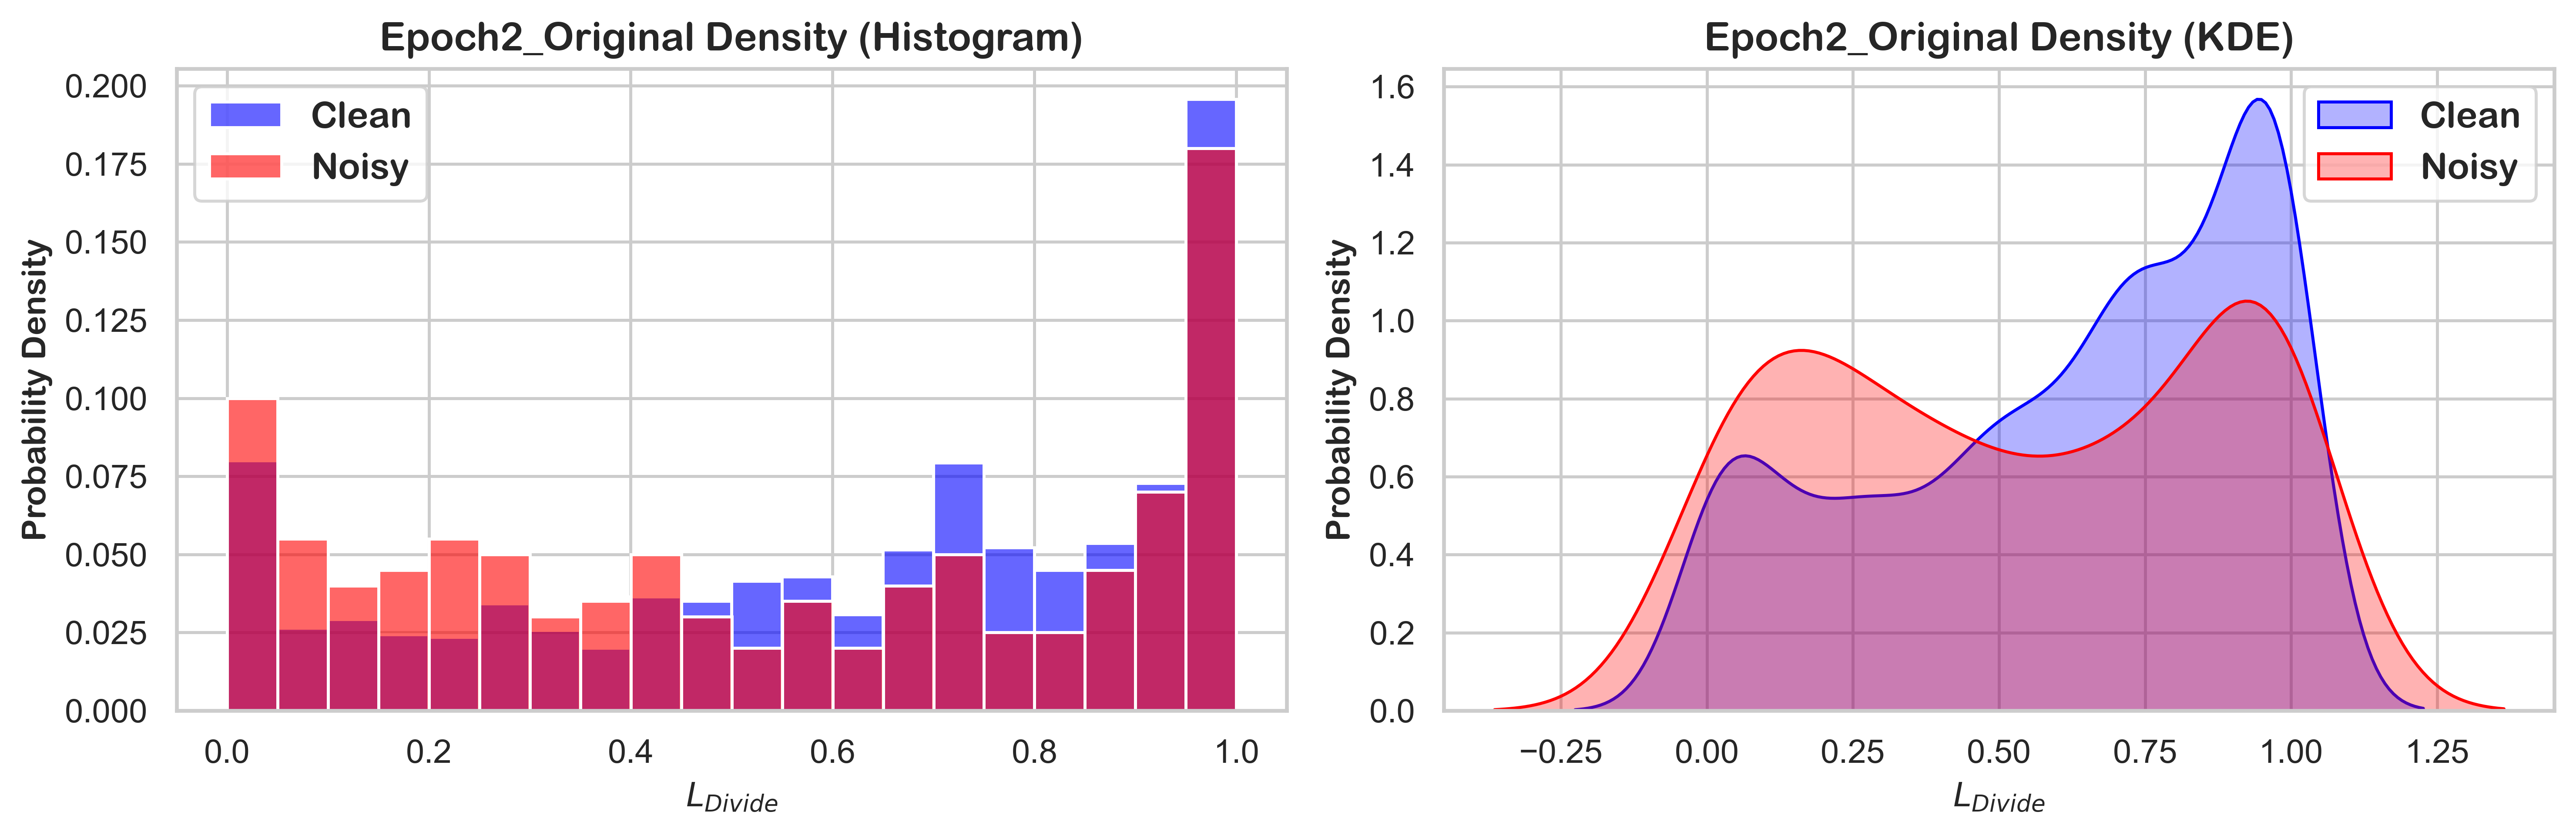

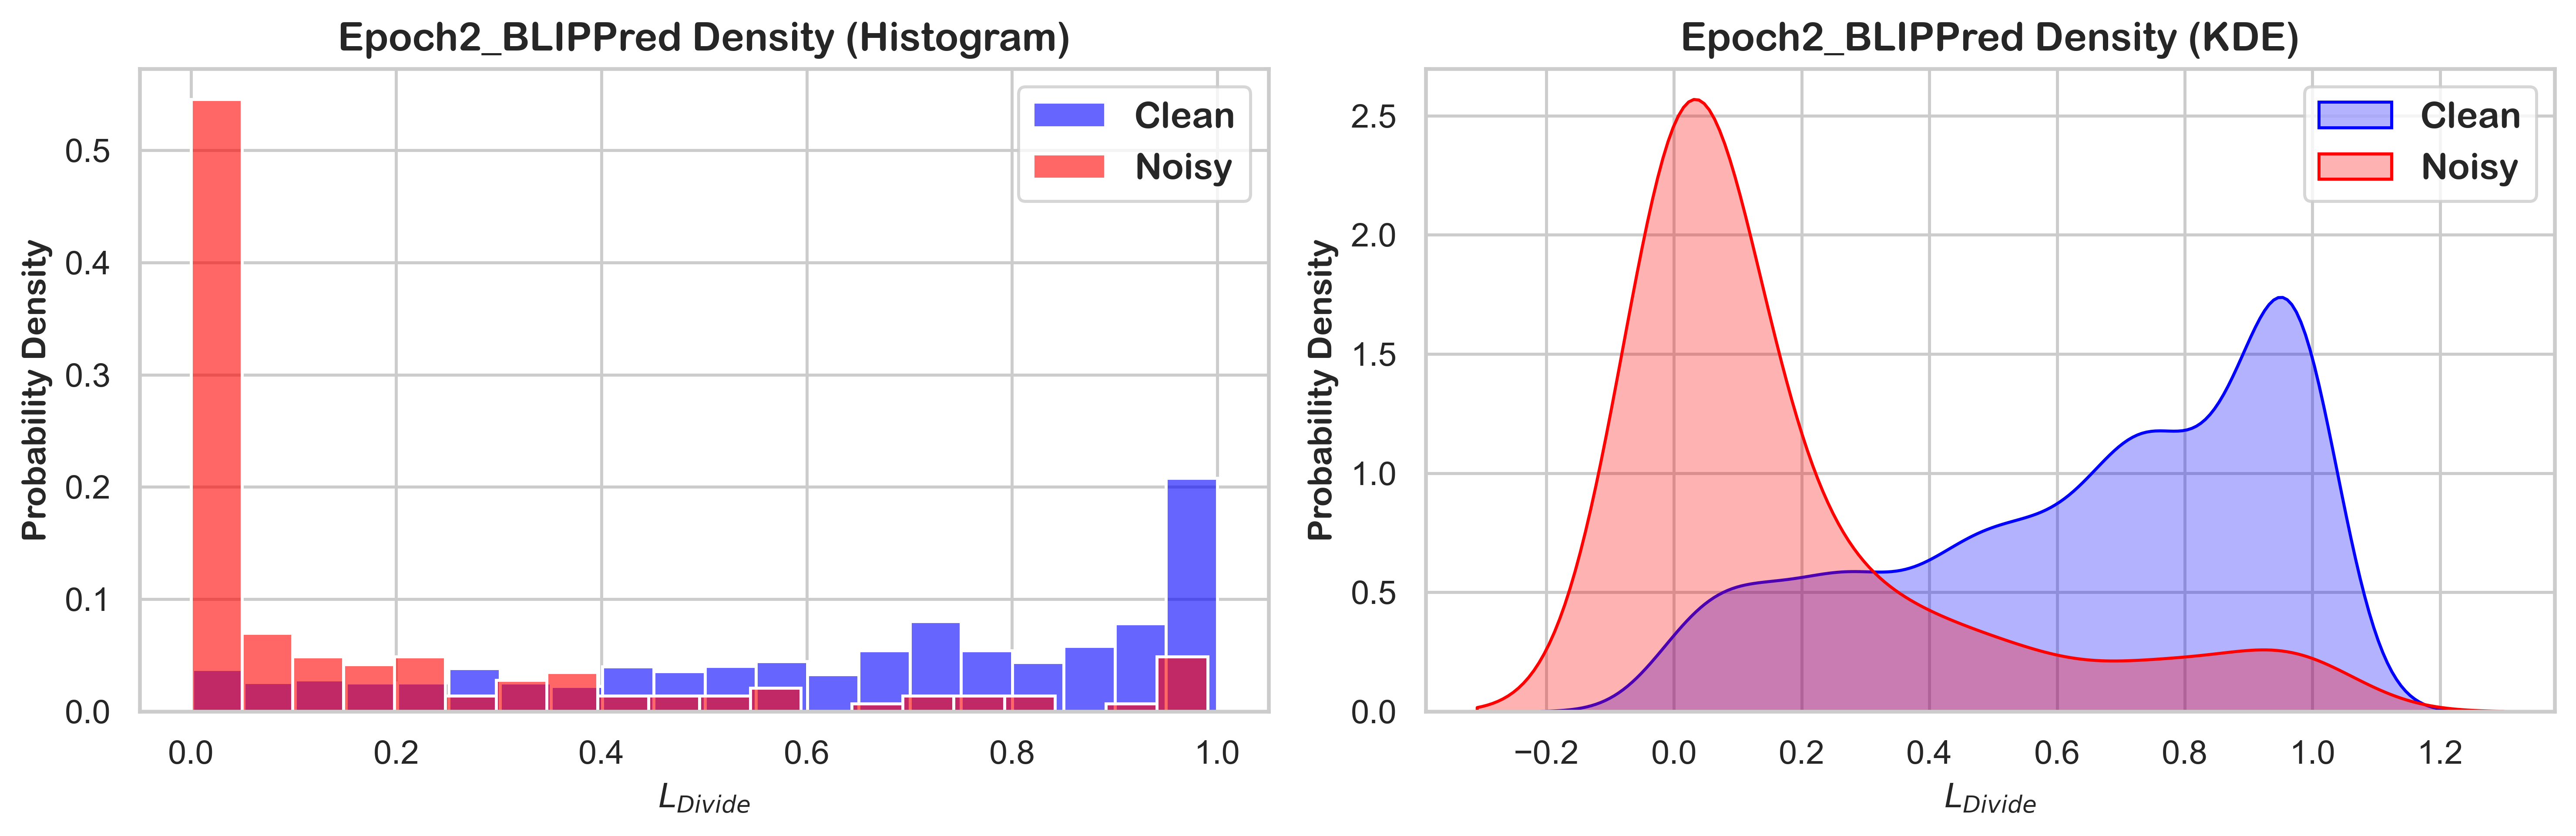

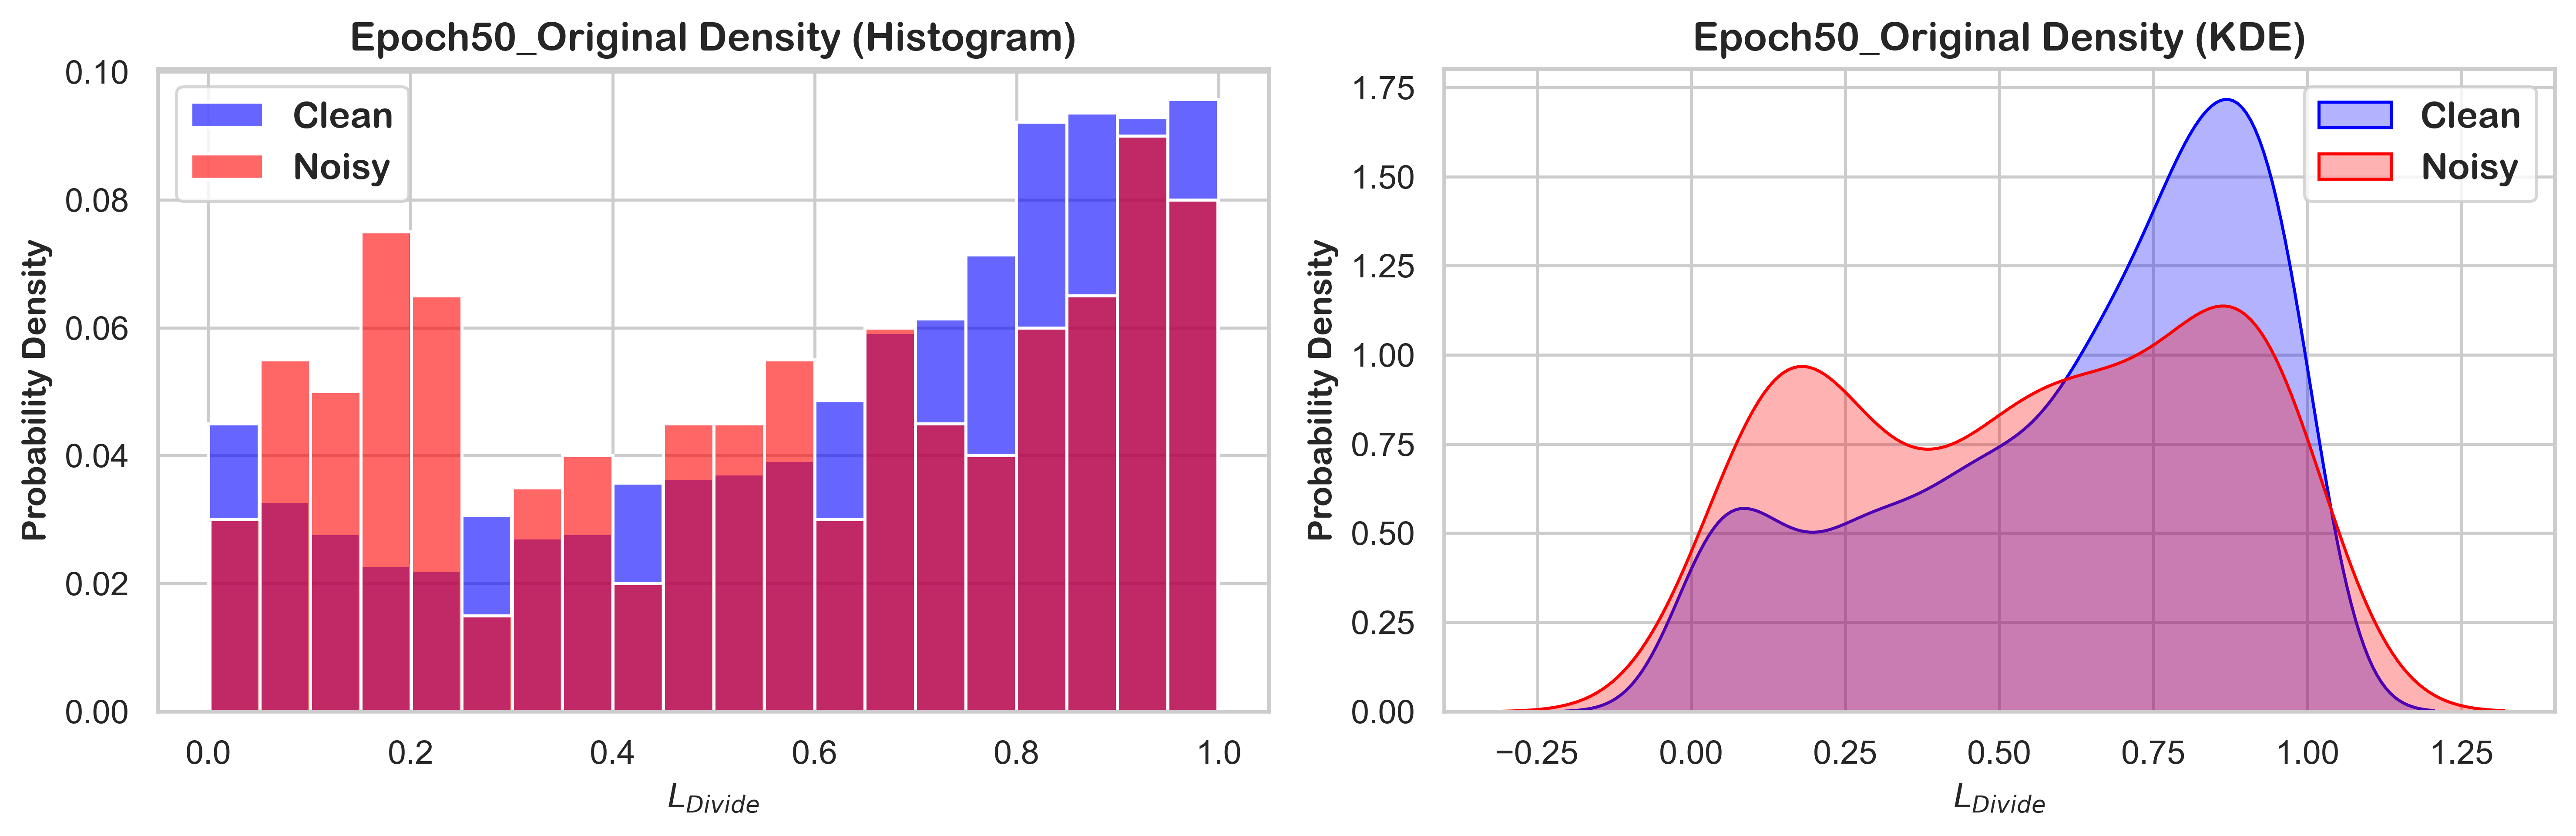

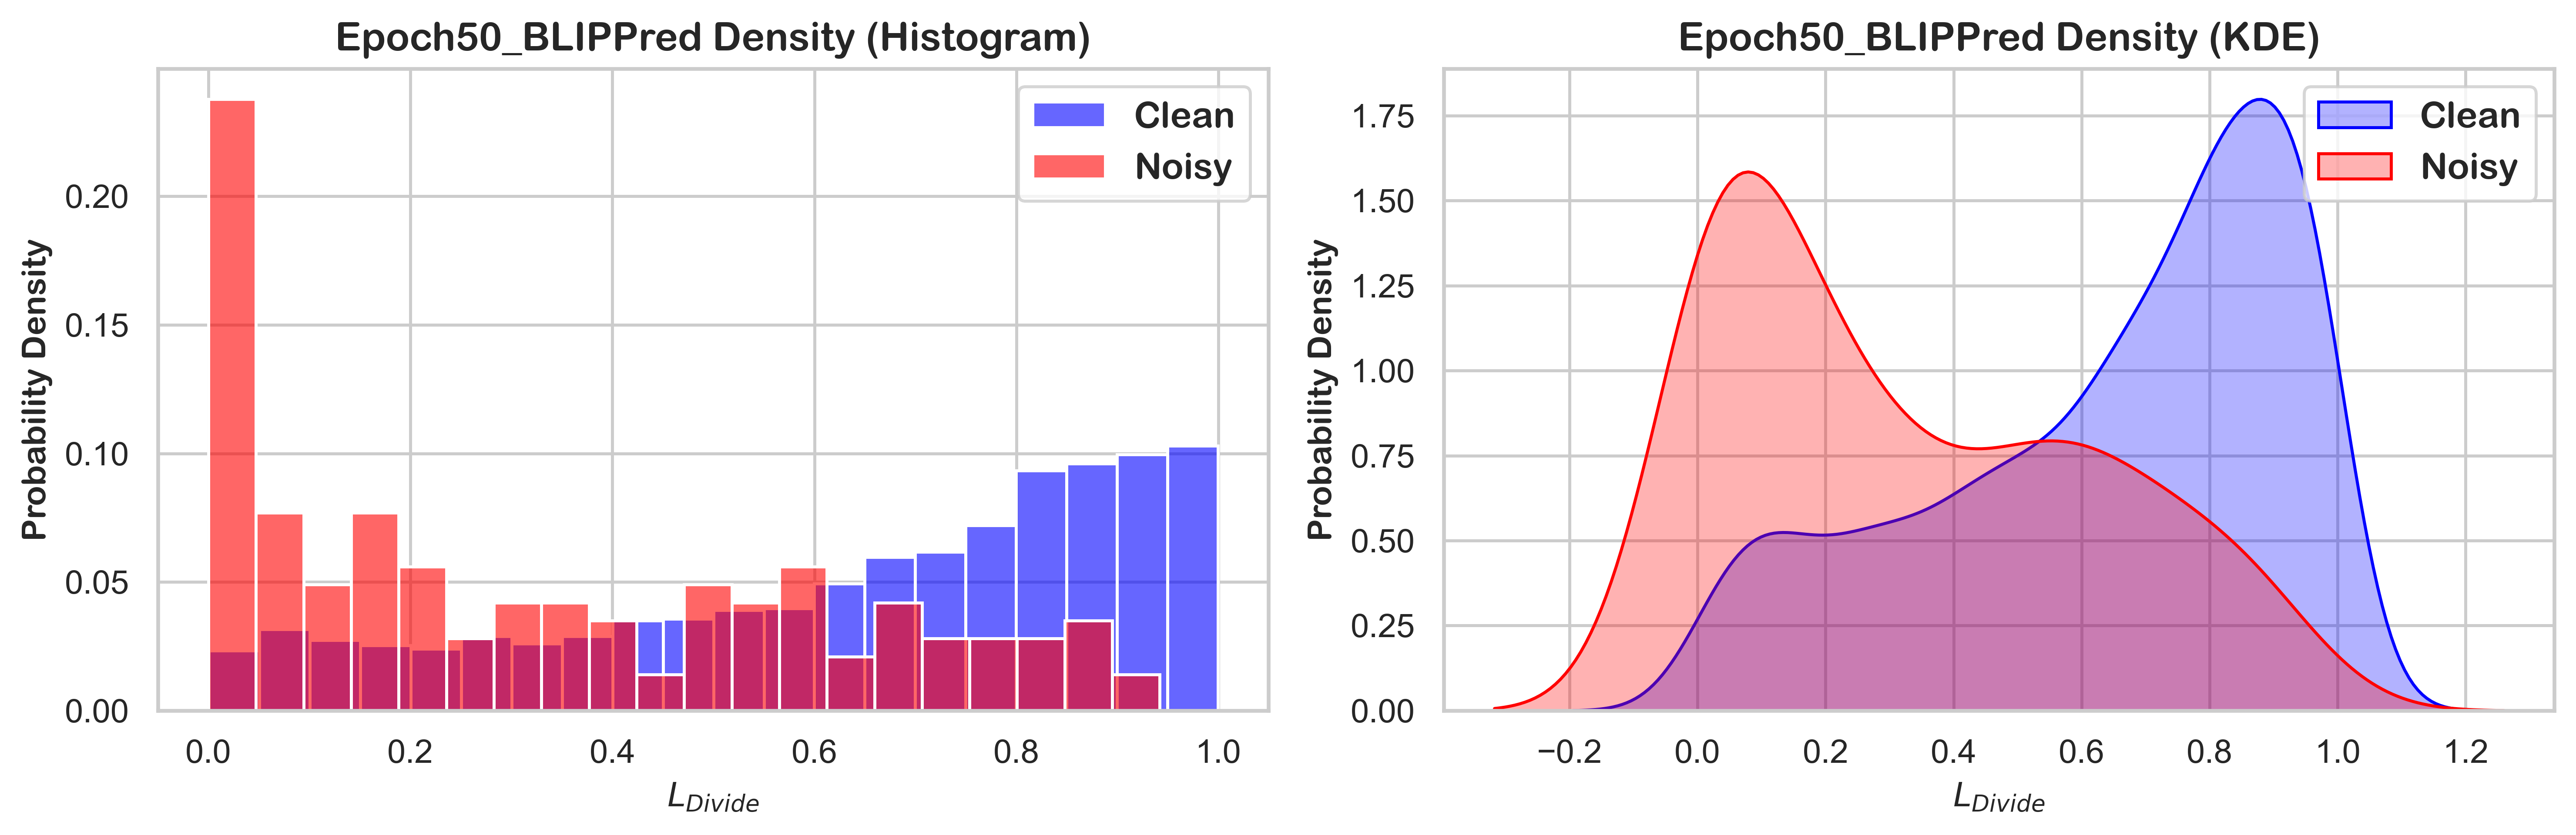

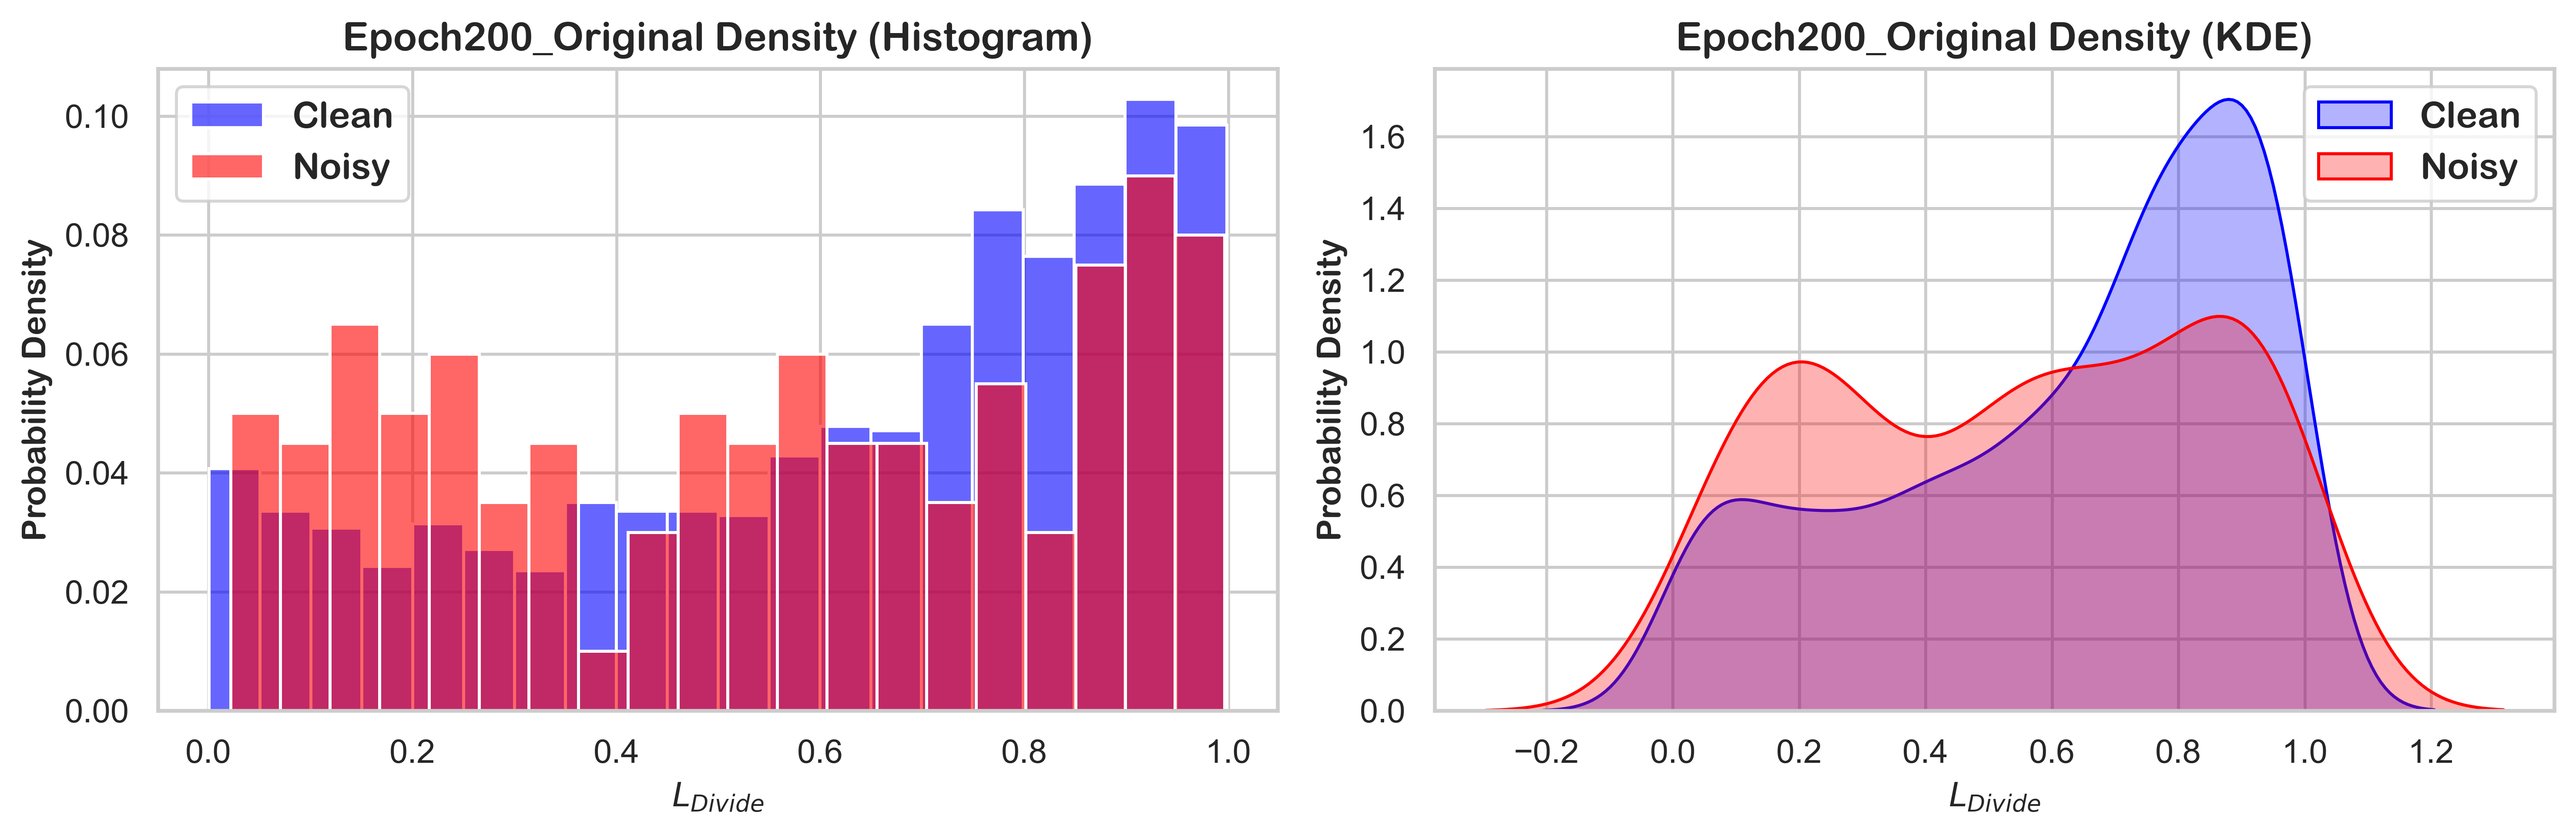

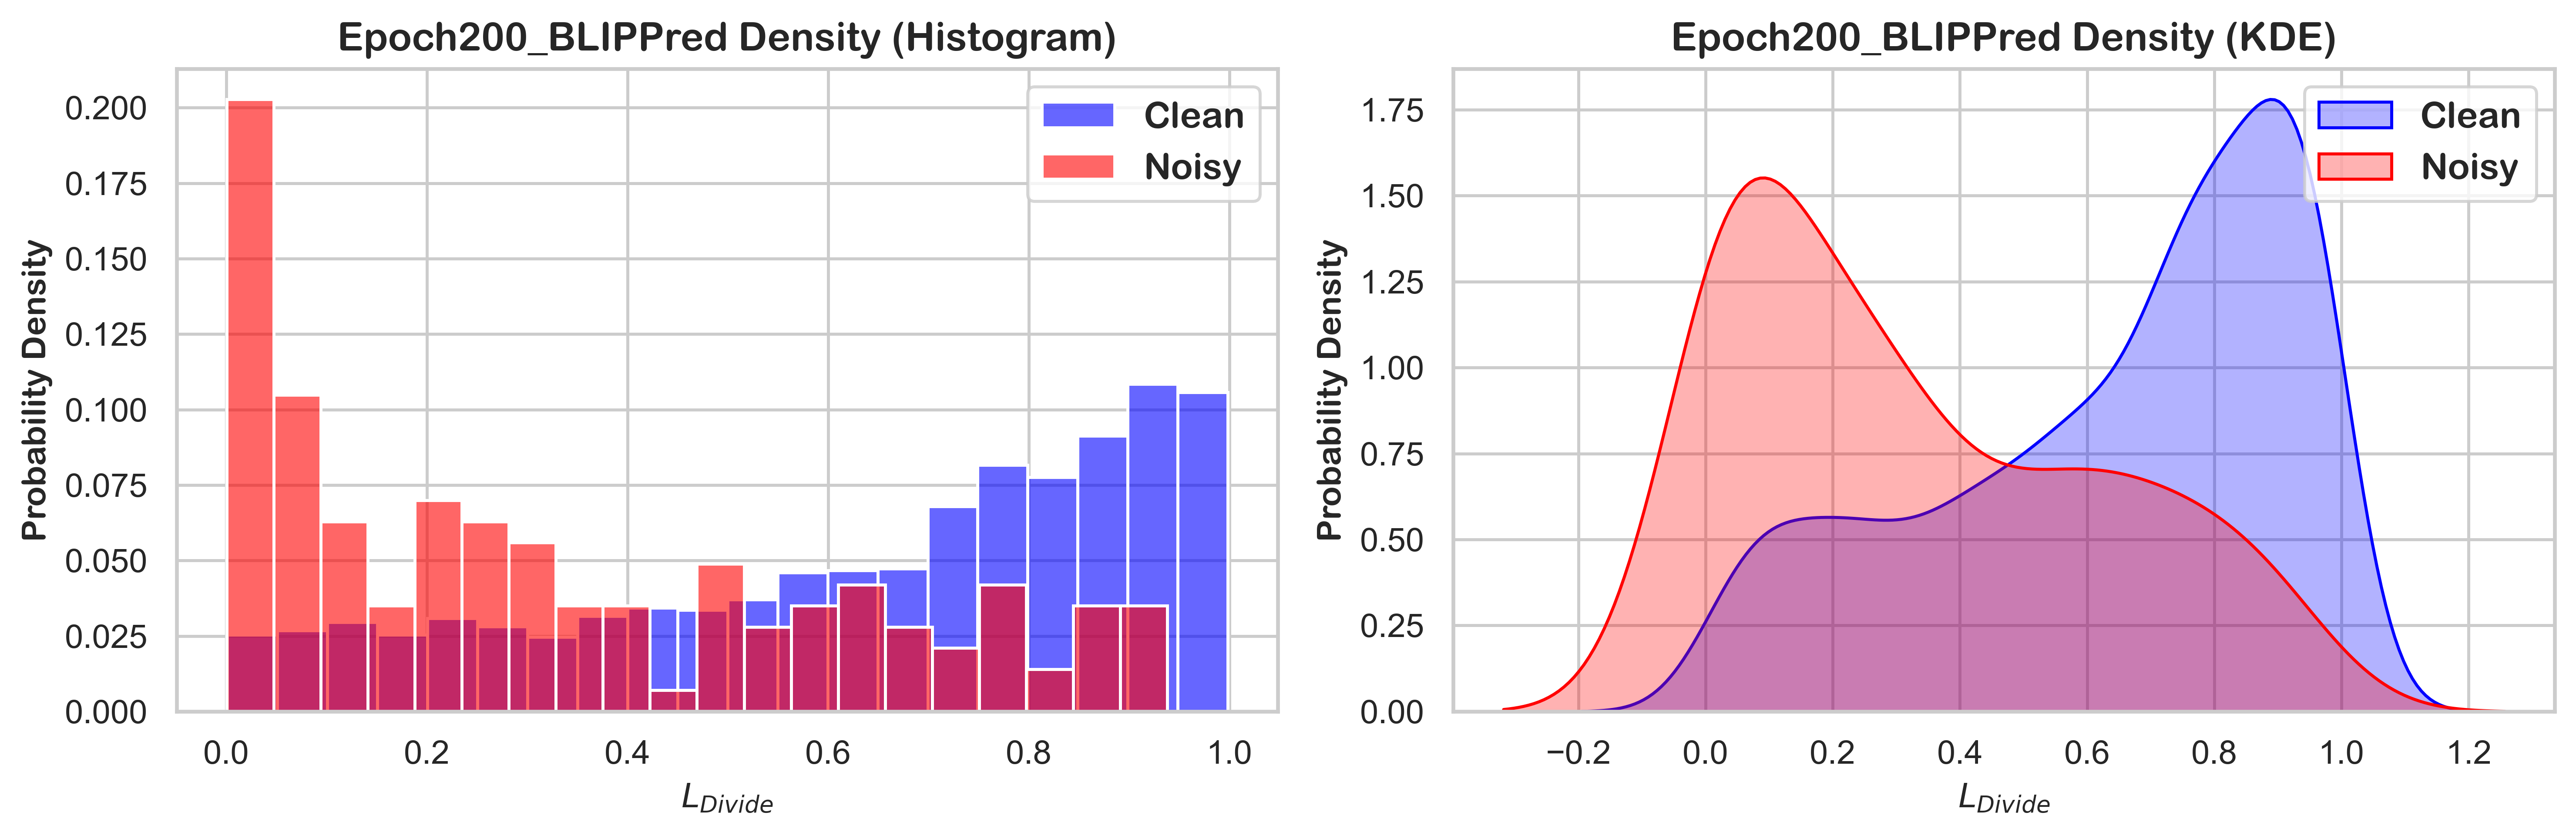

In [29]:
epoches = ['2', '50', '200']

for ep in epoches:
    output_dir = '../output/RobustPromptLearning/BLIPScore'
    noisy_sub, clean_sub = df.loc[noisy_id, ep], df.loc[clean_id, ep]
    pred_noisy_sub, pred_clean_sub = df.loc[pred_noisy_id, ep], df.loc[pred_clean_id, ep]
    
    visualize_samples(f"Epoch{ep}_Original", clean_sub, noisy_sub, output_dir)
    visualize_samples(f"Epoch{ep}_BLIPPred", pred_clean_sub, pred_noisy_sub, output_dir)

In [60]:
def visualize_histogram(data_names, data_clean, data_noisy, output_dir):
    # Fonts style
    font_prop1 = FontProperties(fname="../fonts/TIMES.TTF")
    font_prop2 = FontProperties(fname="../fonts/ARLRDBD.TTF", size=8)
    font_size = 10
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(2, 3, figsize=(12, 4), dpi=500)

    for i in range(len(data_clean)):
        sub_clean, sub_noisy = data_clean[i], data_noisy[i]
        
        # histplot for sub-figure
        sns.histplot(sub_clean, color="blue", label="Clean", kde=False, stat="probability", bins=20, alpha=0.6, ax=axes[i//3, i%3])
        sns.histplot(sub_noisy, color="red", label="Noisy", kde=False, stat="probability", bins=20, alpha=0.6, ax=axes[i//3, i%3])
        axes[i//3, i%3].set_title(f'{data_names[i//3][i%3]}', fontproperties=font_prop2, fontsize=font_size + 2)
        axes[i//3, i%3].set_xlabel('')
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].legend(prop=font_prop2)
    
    for i in range(3):
        axes[1, i].set_xlabel(r'$Score_{BLIP}$', fontproperties=font_prop2, fontsize=font_size+1)
    
    for j in range(2):
        axes[j, 0].set_ylabel('Probability Density', fontproperties=font_prop2, fontsize=font_size)
    
    plt.tight_layout()

    folder_path = os.path.join(output_dir)

    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    plt.savefig(os.path.join(folder_path, f"OriginalVSBLIP.png"), format="png")
    plt.show()

In [ ]:
epoches = ['2', '50', '200']

output_dir = '../output/RobustPromptLearning/BLIPScore'
data_clean, data_noisy = [], []
for ep in epoches:
    data_noisy.append(df.loc[noisy_id, ep])
    data_clean.append(df.loc[clean_id, ep])

for ep in epoches:
    data_noisy.append(df.loc[pred_noisy_id, ep])
    data_clean.append(df.loc[pred_clean_id, ep])

data_names = [["Original Epoch 2", "Original Epoch 50", "Original Epoch 200"],
              ["Refined Epoch 2", "Refined Epoch 50", "Refined Epoch 200"]]
visualize_histogram(data_names, data_clean, data_noisy, output_dir)

## 直方图对比模板

In [ ]:
def visualize_histogram(data_names, data_clean, data_noisy, output_dir):
    # Fonts style
    font_prop1 = FontProperties(fname="../fonts/TIMES.TTF")
    font_prop2 = FontProperties(fname="../fonts/ARLRDBD.TTF", size=8)
    font_size = 10
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(2, 3, figsize=(12, 4), dpi=500)

    for i in range(len(data_clean)):
        sub_clean, sub_noisy = data_clean[i], data_noisy[i]
        
        # histplot for sub-figure
        sns.histplot(sub_clean, color="blue", label="Clean", kde=False, stat="probability", bins=20, alpha=0.6, ax=axes[i//3, i%3])
        sns.histplot(sub_noisy, color="red", label="Noisy", kde=False, stat="probability", bins=20, alpha=0.6, ax=axes[i//3, i%3])
        axes[i//3, i%3].set_title(f'{data_names[i//3][i%3]}', fontproperties=font_prop2, fontsize=font_size + 2)
        axes[i//3, i%3].set_xlabel('')
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].legend(prop=font_prop2)
    
    for i in range(3):
        axes[1, i].set_xlabel(r'$Score_{BLIP}$', fontproperties=font_prop2, fontsize=font_size+1)
    
    for j in range(2):
        axes[j, 0].set_ylabel('Probability Density', fontproperties=font_prop2, fontsize=font_size)
    
    plt.tight_layout()

    folder_path = os.path.join(output_dir)

    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    plt.savefig(os.path.join(folder_path, f"OriginalVSBLIP.png"), format="png")
    plt.show()